## 01. package load

In [1]:
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
sys.path.append(os.pardir)
from models.ac_blstm_kr import ACBLSTMClassifier
from models.word_embedding import get_embedding_matrix

### local gpu setting

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

### Assing data path

In [3]:
DATA_IN_PATH = '../assets/data/npy_data/2020-05-31/'
# Data save label
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'
DATA_CONFIGS = 'data_configs.json'
SEQ_CONFIGS = 'seq_configs_bt.json'

# Train label save file name
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_LABEL_SMALL = 'train_label_small.npy'
TEST_LABEL_DATA = 'test_label.npy'
TEST_LABEL_DATA_SMALL = 'test_label_small.npy'

### set cnn parameter

## AC-LSTM train module parameter

+ parameter and default value

    embedding_matrix=None (word2vec or doc2vec weight matrix)  
    vocab_size=None  (train vocab size)  
    pre_trained_mode=None ('d2v', 'w2v', 'pt_w2v')  
    num_filters=128  
    lstm_dimension=256  
    hidden_dimension=128  
    dropout_rate=0.5  
    batch_size = 64  
    num_epochs = 1000  
    valid_split = 0.2  
    optimizer = 'adam'  ('adam' or 'radam')  
    train_mode='rand ' ('rand', 'pt') 
    
    
+ pt_w2v is pre-trained word2vec which is trained korean wikipedia doctumentation(document size : 420000) 
+ embedding_matrix and pre_trained_mode cannot assign when train_mode is 'rand'
+ embedding_matrix and pre_trained_mode can assign when train_mode is 'pt'

In [4]:
from notebook_example.test_package.ac_blstm_train import ACBLSTMTrain

## 02. Load  Data and make embedding matrix

+ Load embedding data

In [5]:
w2v_model_name = '../model_save/embedding_model/Word2vec1.model'
word_vectorizer = Word2Vec.load(w2v_model_name)

pre_trained_name = '../model_save/embedding_model/trained_word2vec1.model'
pre_trained_w2v = Word2Vec.load(pre_trained_name)

+ Load data

In [6]:
train_X = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_Y = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
test_X = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_Y = np.load(open(DATA_IN_PATH + TEST_LABEL_DATA, 'rb'))
train_YS = tf.one_hot(train_Y, 43)
test_YS = tf.one_hot(test_Y, 43)
data_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))
vocab_size = data_configs['vocab_size'] + 1
print("vocab_size : ", vocab_size)
word_index = data_configs['vocab']

vocab_size :  30079


##  03. AC-BLSTM randomly weight initialized

## optimizer adam

In [7]:
acblstm_train_rand = ACBLSTMTrain(vocab_size=vocab_size)

big_class
output_dim :  43
./model_save/acblstm_model/
train_mode : rand, optimizer : adam, pre-trained_mode : None, model_name : AC-BLSTM_rand_adam


In [8]:
model, histroy = acblstm_train_rand.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'lstm_dimension': 256, 'hidden_dimension': 128, 'train_mode': 'rand', 'output_dimension': 43, 'model_name': 'AC-BLSTM_rand_adam'}
./model_save/acblstm_model/AC-BLSTM_rand_adam -- Folder already exists 

callback set
Epoch 1/1000
135/135 [==============================] - ETA: 0s - loss: 2.3166 - accuracy: 0.3825 - f1_score: 0.2913
Epoch 00001: val_accuracy improved from -inf to 0.70714, saving model to ./model_save/acblstm_model/AC-BLSTM_rand_adam/weights.h5
135/135 [==============================] - 14s 102ms/step - loss: 2.3166 - accuracy: 0.3825 - f1_score: 0.2913 - val_loss: 1.0936 - val_accuracy: 0.7071 - val_f1_score: 0.5825
Epoch 2/1000
135/135 [==============================] - ETA: 0s - loss: 0.5846 - accuracy: 0.8354 - f1_score: 0.7668
Epoch 00002: val_accuracy improved from 0.70714 to 0.79240, saving model to ./model_save/acblstm_model/AC-BLSTM_rand_adam/weights.h5
135/135 [================

135/135 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995 - f1_score: 0.9996    - ETA:
Epoch 00021: val_accuracy did not improve from 0.82298
135/135 [==============================] - 12s 90ms/step - loss: 0.0020 - accuracy: 0.9995 - f1_score: 0.9996 - val_loss: 1.2647 - val_accuracy: 0.8211 - val_f1_score: 0.7845
Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9827 - f1_score: 0.9797
Epoch 00022: val_accuracy did not improve from 0.82298
135/135 [==============================] - 12s 92ms/step - loss: 0.0590 - accuracy: 0.9827 - f1_score: 0.9797 - val_loss: 1.2917 - val_accuracy: 0.7711 - val_f1_score: 0.7312
Epoch 23/1000
135/135 [==============================] - ETA: 0s - loss: 0.1188 - accuracy: 0.9664 - f1_score: 0.9597
Epoch 00023: val_accuracy did not improve from 0.82298
135/135 [==============================] - 12s 90ms/step - loss: 0.1188 - accuracy: 0.9664 - f1_score: 0.9597 - val_loss: 1.1783 - val_

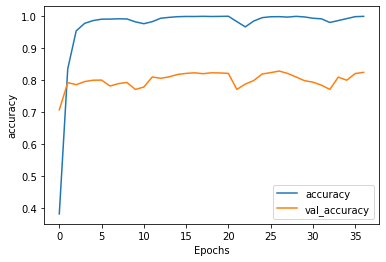

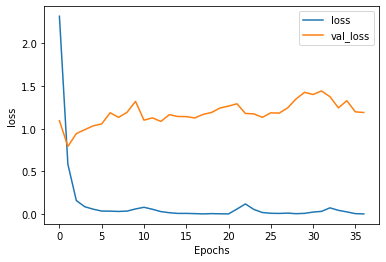

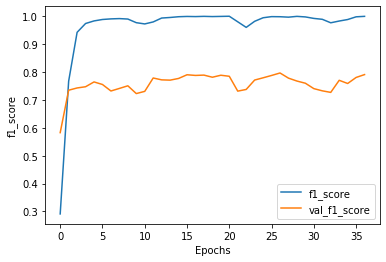

In [9]:
acblstm_train_rand.train_plot(model, histroy)

In [10]:
acblstm_train_rand.evaluation(model, test_X, test_YS)

145/145 [==============================] - 2s 11ms/step - loss: 1.0795 - accuracy: 0.8359 - f1_score: 0.8019


## optimizer radam

In [11]:
acblstm_train_rand = ACBLSTMTrain(vocab_size=vocab_size, optimizer='radam', batch_size=32)

big_class
output_dim :  43
./model_save/acblstm_model/
train_mode : rand, optimizer : radam, pre-trained_mode : None, model_name : AC-BLSTM_rand_radam


In [12]:
model, histroy = acblstm_train_rand.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'lstm_dimension': 256, 'hidden_dimension': 128, 'train_mode': 'rand', 'output_dimension': 43, 'model_name': 'AC-BLSTM_rand_radam'}
./model_save/acblstm_model/AC-BLSTM_rand_radam -- Folder create complete 

callback set
Epoch 1/1000
270/270 [==============================] - ETA: 0s - loss: 3.2531 - accuracy: 0.1316 - f1_score: 0.0603
Epoch 00001: val_accuracy improved from -inf to 0.32623, saving model to ./model_save/acblstm_model/AC-BLSTM_rand_radam/weights.h5
270/270 [==============================] - 38s 140ms/step - loss: 3.2531 - accuracy: 0.1316 - f1_score: 0.0603 - val_loss: 2.4484 - val_accuracy: 0.3262 - val_f1_score: 0.1613
Epoch 2/1000
270/270 [==============================] - ETA: 0s - loss: 1.6686 - accuracy: 0.5375 - f1_score: 0.3871
Epoch 00002: val_accuracy improved from 0.32623 to 0.66497, saving model to ./model_save/acblstm_model/AC-BLSTM_rand_radam/weights.h5
270/270 [===========

270/270 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9851 - f1_score: 0.9832
Epoch 00021: val_accuracy did not improve from 0.79055
270/270 [==============================] - 37s 135ms/step - loss: 0.0536 - accuracy: 0.9851 - f1_score: 0.9832 - val_loss: 1.3229 - val_accuracy: 0.7753 - val_f1_score: 0.7318
Epoch 22/1000
270/270 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9834 - f1_score: 0.9810
Epoch 00022: val_accuracy did not improve from 0.79055
270/270 [==============================] - 37s 136ms/step - loss: 0.0566 - accuracy: 0.9834 - f1_score: 0.9810 - val_loss: 1.3521 - val_accuracy: 0.7739 - val_f1_score: 0.7272
Epoch 23/1000
270/270 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.9775 - f1_score: 0.9712
Epoch 00023: val_accuracy did not improve from 0.79055
270/270 [==============================] - 37s 135ms/step - loss: 0.0739 - accuracy: 0.9775 - f1_score: 0.9712 - val_loss: 1.2425 - val_accurac

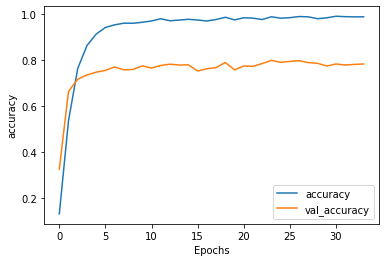

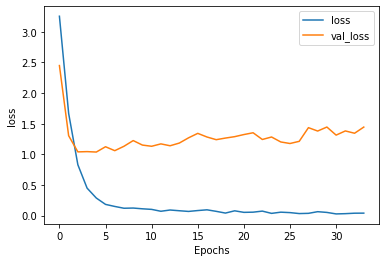

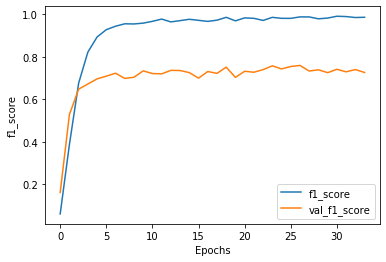

In [13]:
acblstm_train_rand.train_plot(model, histroy)

In [14]:
acblstm_train_rand.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 26ms/step - loss: 1.1687 - accuracy: 0.8097 - f1_score: 0.7779


## 04. AC-BLSTM with w2v

### optimizer adam

In [15]:
acblstm_train_w2v = ACBLSTMTrain(vocab_size=vocab_size, 
                                 train_mode='pt', 
                                 embedding_matrix=word_vectorizer,
                                 word_index=word_index,
                                 pre_trained_mode='w2v')

big_class
output_dim :  43
./model_save/acblstm_model/
word index size :  30079
27423 2655
train_mode : pt, optimizer : adam, pre-trained_mode : w2v, model_name : AC-BLSTM_pt_adam_w2v


In [16]:
model, histroy = acblstm_train_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'lstm_dimension': 256, 'hidden_dimension': 128, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'AC-BLSTM_pt_adam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]])}
./model_save/acblstm_model/AC-BLSTM_pt_adam_w2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] - ETA: 

Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9844 - f1_score: 0.9829
Epoch 00020: val_accuracy did not improve from 0.84059
135/135 [==============================] - 12s 89ms/step - loss: 0.0528 - accuracy: 0.9844 - f1_score: 0.9829 - val_loss: 0.9452 - val_accuracy: 0.8346 - val_f1_score: 0.8081
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9861 - f1_score: 0.9802
Epoch 00021: val_accuracy did not improve from 0.84059
135/135 [==============================] - 12s 89ms/step - loss: 0.0523 - accuracy: 0.9861 - f1_score: 0.9802 - val_loss: 0.9335 - val_accuracy: 0.8262 - val_f1_score: 0.7943
Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9942 - f1_score: 0.9919
Epoch 00022: val_accuracy improved from 0.84059 to 0.84615, saving model to ./model_save/acblstm_model/AC-BLSTM_pt_adam_w2v/weights.h5
135/135 [==============================] - 12s 92ms

Epoch 43/1000
135/135 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9980 - f1_score: 0.9977
Epoch 00043: val_accuracy improved from 0.85589 to 0.86145, saving model to ./model_save/acblstm_model/AC-BLSTM_pt_adam_w2v/weights.h5
135/135 [==============================] - 12s 92ms/step - loss: 0.0071 - accuracy: 0.9980 - f1_score: 0.9977 - val_loss: 1.0805 - val_accuracy: 0.8614 - val_f1_score: 0.8332
Epoch 44/1000
135/135 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981 - f1_score: 0.9977
Epoch 00044: val_accuracy improved from 0.86145 to 0.86191, saving model to ./model_save/acblstm_model/AC-BLSTM_pt_adam_w2v/weights.h5
135/135 [==============================] - 12s 92ms/step - loss: 0.0061 - accuracy: 0.9981 - f1_score: 0.9977 - val_loss: 1.0911 - val_accuracy: 0.8619 - val_f1_score: 0.8316
Epoch 45/1000
135/135 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9993 - f1_score: 0.9993
Epoch 00045: val_accuracy 

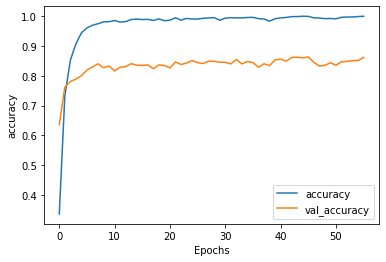

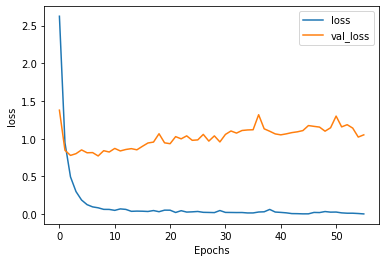

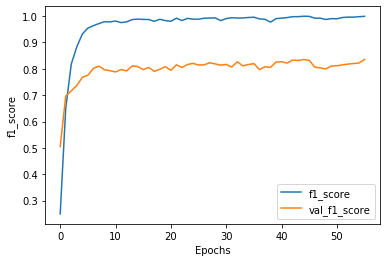

In [17]:
acblstm_train_w2v.train_plot(model, histroy)

In [18]:
acblstm_train_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 2s 10ms/step - loss: 1.0262 - accuracy: 0.8724 - f1_score: 0.8540


### optimizer radam

In [19]:
acblstm_train_w2v = ACBLSTMTrain(vocab_size=vocab_size, 
                                train_mode='pt', 
                                optimizer='radam',
                                word_index=word_index,
                                embedding_matrix=word_vectorizer,
                                pre_trained_mode='w2v')

big_class
output_dim :  43
./model_save/acblstm_model/
word index size :  30079
27423 2655
train_mode : pt, optimizer : radam, pre-trained_mode : w2v, model_name : AC-BLSTM_pt_radam_w2v


In [20]:
model, histroy = acblstm_train_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'lstm_dimension': 256, 'hidden_dimension': 128, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'AC-BLSTM_pt_radam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]])}
./model_save/acblstm_model/AC-BLSTM_pt_radam_w2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] - ETA

Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9662 - f1_score: 0.9635
Epoch 00020: val_accuracy did not improve from 0.81511
135/135 [==============================] - 21s 153ms/step - loss: 0.0987 - accuracy: 0.9662 - f1_score: 0.9635 - val_loss: 1.0252 - val_accuracy: 0.7887 - val_f1_score: 0.7525
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.1016 - accuracy: 0.9692 - f1_score: 0.9653
Epoch 00021: val_accuracy did not improve from 0.81511
135/135 [==============================] - 21s 153ms/step - loss: 0.1016 - accuracy: 0.9692 - f1_score: 0.9653 - val_loss: 0.8621 - val_accuracy: 0.8095 - val_f1_score: 0.7740
Epoch 22/1000
135/135 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9736 - f1_score: 0.9701
Epoch 00022: val_accuracy did not improve from 0.81511
135/135 [==============================] - 21s 153ms/step - loss: 0.0802 - accuracy: 0.9736 - f1_score: 0.9701 - val_loss: 0.9297

Epoch 42/1000
135/135 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9849 - f1_score: 0.9832
Epoch 00042: val_accuracy did not improve from 0.84523
135/135 [==============================] - 21s 154ms/step - loss: 0.0493 - accuracy: 0.9849 - f1_score: 0.9832 - val_loss: 0.9461 - val_accuracy: 0.8369 - val_f1_score: 0.8108
Epoch 43/1000
135/135 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9851 - f1_score: 0.9833
Epoch 00043: val_accuracy did not improve from 0.84523
135/135 [==============================] - 21s 153ms/step - loss: 0.0491 - accuracy: 0.9851 - f1_score: 0.9833 - val_loss: 1.0128 - val_accuracy: 0.8313 - val_f1_score: 0.8019
Epoch 44/1000
135/135 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9832 - f1_score: 0.9822
Epoch 00044: val_accuracy did not improve from 0.84523
135/135 [==============================] - 21s 153ms/step - loss: 0.0540 - accuracy: 0.9832 - f1_score: 0.9822 - val_loss: 0.9451

Epoch 65/1000
135/135 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9830 - f1_score: 0.9784
Epoch 00065: val_accuracy did not improve from 0.85449
135/135 [==============================] - 21s 154ms/step - loss: 0.0541 - accuracy: 0.9830 - f1_score: 0.9784 - val_loss: 1.1468 - val_accuracy: 0.8415 - val_f1_score: 0.8148
Epoch 66/1000
135/135 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9903 - f1_score: 0.9880
Epoch 00066: val_accuracy did not improve from 0.85449
135/135 [==============================] - 21s 154ms/step - loss: 0.0344 - accuracy: 0.9903 - f1_score: 0.9880 - val_loss: 1.2272 - val_accuracy: 0.8355 - val_f1_score: 0.8125
Epoch 67/1000
135/135 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9906 - f1_score: 0.9872
Epoch 00067: val_accuracy did not improve from 0.85449
135/135 [==============================] - 21s 154ms/step - loss: 0.0291 - accuracy: 0.9906 - f1_score: 0.9872 - val_loss: 1.1877

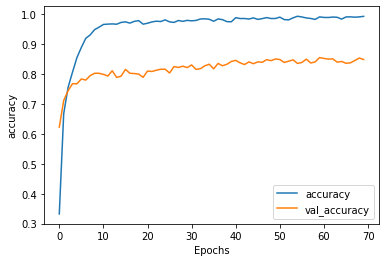

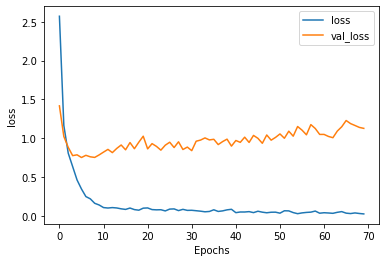

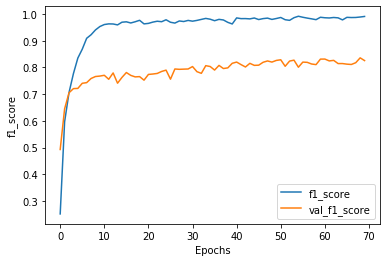

In [21]:
acblstm_train_w2v.train_plot(model, histroy)

In [22]:
acblstm_train_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 26ms/step - loss: 0.9493 - accuracy: 0.8648 - f1_score: 0.8414


## 05 AC-BLSTM w2v-pretrained

### optimizer adam

In [23]:
acblstm_train_pt_w2v = ACBLSTMTrain(vocab_size=vocab_size, 
                                          train_mode='pt', 
                                          embedding_matrix=pre_trained_w2v,
                                          word_index=word_index,
                                          pre_trained_mode='pt_w2v')

big_class
output_dim :  43
./model_save/acblstm_model/
word index size :  30079
28173 1905
train_mode : pt, optimizer : adam, pre-trained_mode : pt_w2v, model_name : AC-BLSTM_pt_adam_pt_w2v


In [24]:
model, histroy = acblstm_train_pt_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'lstm_dimension': 256, 'hidden_dimension': 128, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'AC-BLSTM_pt_adam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]])}
./model_save/acblstm_model/AC-BLSTM_pt_adam_pt_w2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================] -

Epoch 19/1000
135/135 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9958 - f1_score: 0.9952
Epoch 00019: val_accuracy improved from 0.84615 to 0.86006, saving model to ./model_save/acblstm_model/AC-BLSTM_pt_adam_pt_w2v/weights.h5
135/135 [==============================] - 12s 90ms/step - loss: 0.0174 - accuracy: 0.9958 - f1_score: 0.9952 - val_loss: 0.8766 - val_accuracy: 0.8601 - val_f1_score: 0.8317
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9961 - f1_score: 0.9948
Epoch 00020: val_accuracy did not improve from 0.86006
135/135 [==============================] - 12s 88ms/step - loss: 0.0141 - accuracy: 0.9961 - f1_score: 0.9948 - val_loss: 0.9617 - val_accuracy: 0.8429 - val_f1_score: 0.8143
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9895 - f1_score: 0.9872
Epoch 00021: val_accuracy did not improve from 0.86006
135/135 [==============================] - 12s 8

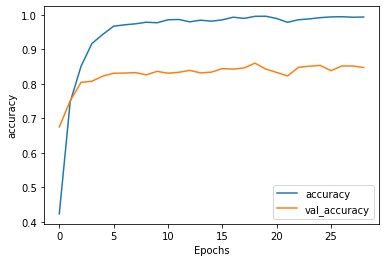

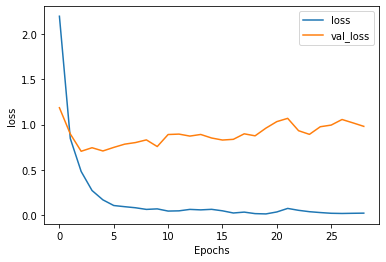

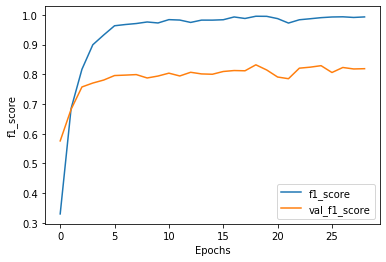

In [25]:
acblstm_train_pt_w2v.train_plot(model, histroy)

In [26]:
acblstm_train_pt_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 10ms/step - loss: 0.7795 - accuracy: 0.8674 - f1_score: 0.8455


### optimizer radam

In [27]:
acblstm_train_pt_w2v = ACBLSTMTrain(vocab_size=vocab_size, 
                                    train_mode='pt', 
                                    optimizer='radam',
                                    embedding_matrix=pre_trained_w2v,
                                    word_index=word_index,
                                    pre_trained_mode='pt_w2v')

big_class
output_dim :  43
./model_save/acblstm_model/
word index size :  30079
28173 1905
train_mode : pt, optimizer : radam, pre-trained_mode : pt_w2v, model_name : AC-BLSTM_pt_radam_pt_w2v


In [28]:
model, histroy = acblstm_train_pt_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'lstm_dimension': 256, 'hidden_dimension': 128, 'train_mode': 'pt', 'output_dimension': 43, 'model_name': 'AC-BLSTM_pt_radam_pt_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.1215607 ,  0.20265704, -0.1296849 , ..., -0.25743967,
        -0.44502595, -0.15552975],
       [-0.07061617,  0.60541958,  0.0075527 , ...,  0.00845565,
        -0.01567723, -0.02487615],
       ...,
       [-0.73014832,  0.27339637, -0.06521773, ..., -0.30837446,
         0.41687673, -0.36610672],
       [-0.78842098, -0.6107676 , -0.37505671, ...,  0.14378503,
        -0.27998501, -0.66035861],
       [-0.59498692,  0.02842285,  0.46921459, ..., -0.48162848,
        -0.31085017, -0.19220926]])}
./model_save/acblstm_model/AC-BLSTM_pt_radam_pt_w2v -- Folder create complete 

callback set
Epoch 1/1000
135/135 [==============================]

135/135 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9759 - f1_score: 0.9694
Epoch 00019: val_accuracy did not improve from 0.81001
135/135 [==============================] - 21s 153ms/step - loss: 0.0790 - accuracy: 0.9759 - f1_score: 0.9694 - val_loss: 0.8622 - val_accuracy: 0.8049 - val_f1_score: 0.7558
Epoch 20/1000
135/135 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9754 - f1_score: 0.9724
Epoch 00020: val_accuracy did not improve from 0.81001
135/135 [==============================] - 21s 152ms/step - loss: 0.0786 - accuracy: 0.9754 - f1_score: 0.9724 - val_loss: 0.9017 - val_accuracy: 0.8007 - val_f1_score: 0.7566
Epoch 21/1000
135/135 [==============================] - ETA: 0s - loss: 0.0953 - accuracy: 0.9700 - f1_score: 0.9685
Epoch 00021: val_accuracy did not improve from 0.81001
135/135 [==============================] - 21s 152ms/step - loss: 0.0953 - accuracy: 0.9700 - f1_score: 0.9685 - val_loss: 0.8781 - val_accurac

Epoch 42/1000
135/135 [==============================] - ETA: 0s - loss: 0.0872 - accuracy: 0.9736 - f1_score: 0.9724
Epoch 00042: val_accuracy improved from 0.83364 to 0.83642, saving model to ./model_save/acblstm_model/AC-BLSTM_pt_radam_pt_w2v/weights.h5
135/135 [==============================] - 21s 158ms/step - loss: 0.0872 - accuracy: 0.9736 - f1_score: 0.9724 - val_loss: 0.9081 - val_accuracy: 0.8364 - val_f1_score: 0.8050
Epoch 43/1000
135/135 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9846 - f1_score: 0.9817
Epoch 00043: val_accuracy did not improve from 0.83642
135/135 [==============================] - 21s 153ms/step - loss: 0.0488 - accuracy: 0.9846 - f1_score: 0.9817 - val_loss: 0.9579 - val_accuracy: 0.8318 - val_f1_score: 0.7956
Epoch 44/1000
135/135 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9917 - f1_score: 0.9905
Epoch 00044: val_accuracy improved from 0.83642 to 0.84662, saving model to ./model_save/acblstm_mod

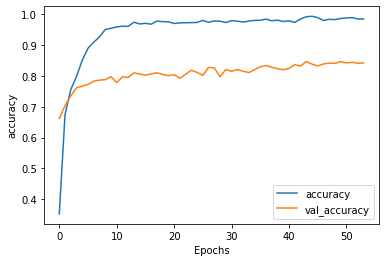

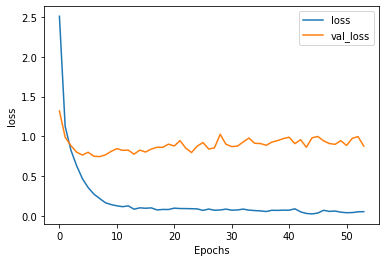

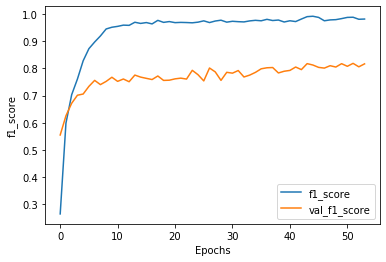

In [29]:
acblstm_train_pt_w2v.train_plot(model, histroy)

In [30]:
acblstm_train_pt_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 4s 26ms/step - loss: 0.8188 - accuracy: 0.8609 - f1_score: 0.8421
